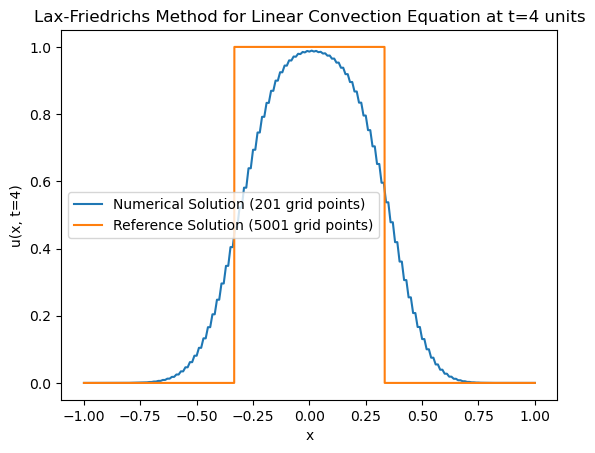

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 2.0  # Length of the domain
Nx = 201  # Number of grid points
dx = L / (Nx - 1)  # Grid spacing
dt = 0.8 * dx  # Time step
Nt = int(4 / dt)  # Number of time steps for t=4 units
c = 1.0  # Convection speed
lambda_val = c * dt / dx  # Courant number

# Initial conditions
u = np.zeros(Nx)
u[(np.abs(np.linspace(-1, 1, Nx)) < 1/3)] = 1.0

# Periodic boundary conditions
u[0] = u[-2]
u[-1] = u[1]

# Reference solution
x_ref = np.linspace(-1, 1, 5001)
u_ref = np.where(np.abs(x_ref) < 1/3, 1.0, 0.0)

# Lax-Friedrichs method
for n in range(Nt):
    u[1:-1] = 0.5 * (u[:-2] + u[2:]) - 0.5 * lambda_val * (u[2:] - u[:-2])
    # Periodic boundary conditions
    u[0] = u[-2]
    u[-1] = u[1]

# Plotting
plt.plot(np.linspace(-1, 1, Nx), u, label='Numerical Solution (201 grid points)')
plt.plot(x_ref, u_ref, label='Reference Solution (5001 grid points)')
plt.title('Lax-Friedrichs Method for Linear Convection Equation at t=4 units')
plt.xlabel('x')
plt.ylabel('u(x, t=4)')
plt.legend()
plt.show()